In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Using TensorFlow backend.
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Merve\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
wine_dataset = pd.read_csv('wine.data',header = None)
wine_dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
wine_dataset.columns = [  'class labels'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

wine_dataset.head(10)

,class labels,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
wine_dataset.isnull().sum()

class labels           0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [19]:
array = wine_dataset.values
X = array[:, 1:]
Y = array[:, 0]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

gnb = GaussianNB()

training_model=gnb.fit(X_train, Y_train)

predictions = gnb.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print("Classification Report:")
print(classification_report(Y_test,predictions))

Accuracy Score: 0.9444444444444444
Confusion Matrix:
[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95        19
         2.0       1.00      0.86      0.93        22
         3.0       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



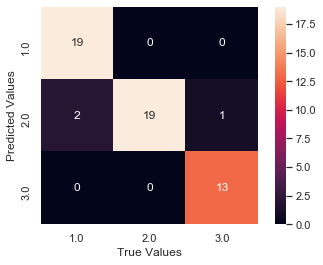

In [13]:
mat = confusion_matrix(Y_test, predictions)
names = np.unique(predictions)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
predictionsmnb = mnb.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test, predictionsmnb))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictionsmnb))
print("Classification Report:")
print(classification_report(Y_test,predictionsmnb))

Accuracy Score: 0.8703703703703703
Confusion Matrix:
[[17  1  1]
 [ 1 19  2]
 [ 1  1 11]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        19
         2.0       0.90      0.86      0.88        22
         3.0       0.79      0.85      0.81        13

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54



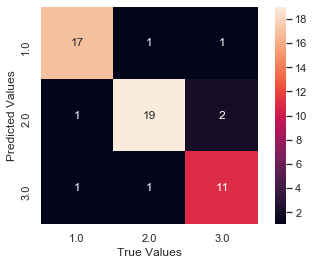

In [15]:
mat2 = confusion_matrix(Y_test, predictionsmnb)
names2 = np.unique(predictionsmnb)
sns.heatmap(mat2, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [16]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
predictionsbnb = bnb.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test, predictionsbnb))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictionsbnb))

Accuracy Score: 0.4074074074074074
Confusion Matrix:
[[ 0 19  0]
 [ 0 22  0]
 [ 0 13  0]]


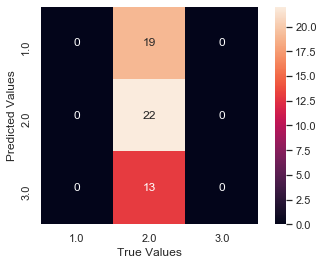

In [17]:
matb = confusion_matrix(Y_test, predictionsbnb)
namesb = np.unique(predictionsbnb)
sns.heatmap(matb, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=names, yticklabels=names)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

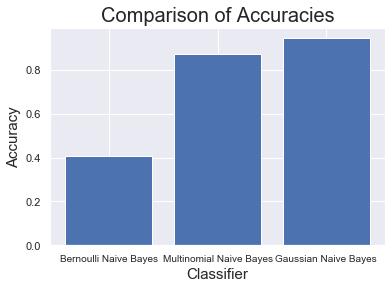

In [18]:
label=['Bernoulli Naive Bayes','Multinomial Naive Bayes','Gaussian Naive Bayes']
index=np.arange(len(label))
acc=[accuracy_score(Y_test, predictionsbnb),accuracy_score(Y_test, predictionsmnb),accuracy_score(Y_test, predictions)]
plt.bar(index,acc)
plt.xlabel('Classifier',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Comparison of Accuracies',fontsize=20)
plt.xticks(index,label,fontsize=10,rotation=0)
plt.show()